In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tcga-gdc-10-tumor-types/gene_annotation.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LUAD.star_fpkm-uq.tsv/TCGA-LUAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-COAD.star_fpkm-uq.tsv/TCGA-COAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-SKCM.star_fpkm-uq.tsv/TCGA-SKCM.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PAAD.star_fpkm-uq.tsv/TCGA-PAAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-BRCA.star_fpkm-uq.tsv/TCGA-BRCA.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LIHC.star_fpkm-uq.tsv/TCGA-LIHC.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-GBM.star_fpkm-uq.tsv/TCGA-GBM.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PRAD.star_fpkm-uq.tsv/TCGA-PRAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-ESCA.star_fpkm-uq.tsv/TCGA-ESCA.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-STAD.star_fpkm-uq.tsv/TCGA-STAD.star_fpkm-uq.tsv


In [2]:
#Import datasets
breast = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-BRCA.star_fpkm-uq.tsv/TCGA-BRCA.star_fpkm-uq.tsv', delimiter='\t')
colon = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-COAD.star_fpkm-uq.tsv/TCGA-COAD.star_fpkm-uq.tsv', delimiter='\t')
esophagus = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-ESCA.star_fpkm-uq.tsv/TCGA-ESCA.star_fpkm-uq.tsv', delimiter='\t')
brain = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-GBM.star_fpkm-uq.tsv/TCGA-GBM.star_fpkm-uq.tsv', delimiter='\t')
liver = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LIHC.star_fpkm-uq.tsv/TCGA-LIHC.star_fpkm-uq.tsv', delimiter='\t')
lung = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LUAD.star_fpkm-uq.tsv/TCGA-LUAD.star_fpkm-uq.tsv', delimiter='\t')
pancreas = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PAAD.star_fpkm-uq.tsv/TCGA-PAAD.star_fpkm-uq.tsv', delimiter='\t')
prostate = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PRAD.star_fpkm-uq.tsv/TCGA-PRAD.star_fpkm-uq.tsv', delimiter='\t')
skin = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-SKCM.star_fpkm-uq.tsv/TCGA-SKCM.star_fpkm-uq.tsv', delimiter='\t')
stomach = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-STAD.star_fpkm-uq.tsv/TCGA-STAD.star_fpkm-uq.tsv', delimiter='\t')

In [3]:
gene_annotation = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/gene_annotation.tsv', delimiter='\t')

In [4]:
tumor_types = ['breast','colon','esophagus','brain','liver','lung','pancreas','prostate','skin','stomach']

In [5]:
breast = breast.drop(breast.filter(like="-11A", axis=1).columns, axis=1)
colon = colon.drop(colon.filter(like="-11A", axis=1).columns, axis=1)
esophagus = esophagus.drop(esophagus.filter(like="-11A", axis=1).columns, axis=1)
brain = brain.drop(brain.filter(like="-11A", axis=1).columns, axis=1)
liver = liver.drop(liver.filter(like="-11A", axis=1).columns, axis=1)
lung = lung.drop(lung.filter(like="-11A", axis=1).columns, axis=1)
pancreas = pancreas.drop(pancreas.filter(like="-11A", axis=1).columns, axis=1)
prostate = prostate.drop(prostate.filter(like="-11A", axis=1).columns, axis=1)
skin = skin.drop(skin.filter(like="-11A", axis=1).columns, axis=1)
stomach = stomach.drop(stomach.filter(like="-11A", axis=1).columns, axis=1)

In [6]:
print(breast.shape)
print(colon.shape)
print(esophagus.shape)
print(brain.shape)
print(liver.shape)
print(lung.shape)
print(pancreas.shape)
print(prostate.shape)
print(skin.shape)
print(stomach.shape)

(60660, 1128)
(60660, 474)
(60660, 186)
(60660, 171)
(60660, 375)
(60660, 532)
(60660, 180)
(60660, 504)
(60660, 473)
(60660, 413)


In [7]:
breast = breast.round(3)
colon = colon.round(3)
esophagus = esophagus.round(3)
brain = brain.round(3)
liver = liver.round(3)
lung = lung.round(3)
pancreas = pancreas.round(3)
prostate = prostate.round(3)
skin = skin.round(3)
stomach = stomach.round(3)

threshold = 0.3

# Drop rows
rows_to_keep = breast.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_breast = breast[rows_to_keep]

rows_to_keep = colon.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_colon = colon[rows_to_keep]

rows_to_keep = esophagus.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_esophagus = esophagus[rows_to_keep]

rows_to_keep = brain.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_brain = brain[rows_to_keep]

rows_to_keep = liver.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_liver = liver[rows_to_keep]

rows_to_keep = lung.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_lung = lung[rows_to_keep]

rows_to_keep = pancreas.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_pancreas = pancreas[rows_to_keep]

rows_to_keep = prostate.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_prostate = prostate[rows_to_keep]

rows_to_keep = skin.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_skin = skin[rows_to_keep]

rows_to_keep = stomach.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_stomach = stomach[rows_to_keep]

In [8]:
print(filtered_breast.shape)
print(filtered_colon.shape)
print(filtered_esophagus.shape)
print(filtered_brain.shape)
print(filtered_liver.shape)
print(filtered_lung.shape)
print(filtered_pancreas.shape)
print(filtered_prostate.shape)
print(filtered_skin.shape)
print(filtered_stomach.shape)

(27516, 1128)
(24603, 474)
(34361, 186)
(29723, 171)
(23386, 375)
(27774, 532)
(27936, 180)
(27570, 504)
(25536, 473)
(32867, 413)


In [9]:
breast_ids = filtered_breast.columns.tolist()
colon_ids = filtered_colon.columns.tolist()
esophagus_ids = filtered_esophagus.columns.tolist()
brain_ids = filtered_brain.columns.tolist()
liver_ids = filtered_liver.columns.tolist()
lung_ids = filtered_lung.columns.tolist()
pancreas_ids = filtered_pancreas.columns.tolist()
prostate_ids = filtered_prostate.columns.tolist()
skin_ids = filtered_skin.columns.tolist()
stomach_ids = filtered_stomach.columns.tolist()

#print(colon_ids)
#print(liver_ids)
#print(lung_ids)

In [10]:
print(colon_ids)
#print(liver_ids)
#print(lung_ids)

['Ensembl_ID', 'TCGA-5M-AAT6-01A', 'TCGA-AA-3552-01A', 'TCGA-AA-3867-01A', 'TCGA-AD-6895-01A', 'TCGA-AA-3560-01A', 'TCGA-CM-6676-01A', 'TCGA-AA-A029-01A', 'TCGA-AA-A01C-01A', 'TCGA-CK-5912-01A', 'TCGA-AA-A03F-01A', 'TCGA-CA-5256-01A', 'TCGA-AA-3844-01A', 'TCGA-CM-6162-01A', 'TCGA-AZ-4684-01A', 'TCGA-AA-3939-01A', 'TCGA-A6-2680-01A', 'TCGA-A6-4105-01A', 'TCGA-F4-6807-01A', 'TCGA-AA-3842-01A', 'TCGA-A6-6781-01B', 'TCGA-CM-5863-01A', 'TCGA-AZ-4616-01A', 'TCGA-T9-A92H-01A', 'TCGA-AA-3811-01A', 'TCGA-AZ-4315-01A', 'TCGA-AA-3712-01A', 'TCGA-AA-3562-01A', 'TCGA-AA-3979-01A', 'TCGA-A6-2677-01A', 'TCGA-AZ-4681-01A', 'TCGA-AA-3972-01A', 'TCGA-AA-3516-01A', 'TCGA-CA-5255-01A', 'TCGA-AA-3858-01A', 'TCGA-AA-3675-01A', 'TCGA-AY-A8YK-01A', 'TCGA-G4-6307-01A', 'TCGA-AA-3713-01A', 'TCGA-AA-3561-01A', 'TCGA-A6-6652-01A', 'TCGA-AZ-6603-01A', 'TCGA-AD-6965-01A', 'TCGA-AA-A00D-01A', 'TCGA-AA-3819-01A', 'TCGA-AA-3971-01A', 'TCGA-AA-3986-01A', 'TCGA-3L-AA1B-01A', 'TCGA-D5-6529-01A', 'TCGA-A6-6653-01A', 'TCGA

In [11]:
gene_annotation = gene_annotation.rename(columns={'id': 'Ensembl_ID'})
gene_annotation.head()

,Ensembl_ID,gene,chrom,chromStart,chromEnd,strand
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,+
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,-
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,-
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,+
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,+


In [118]:
#Check the number of mets samples for a tumor type
coltransposed = filtered_skin.T
# Step 2: Set the first row as column names
coltransposed.columns = coltransposed.iloc[0]

# Step 3: Drop the first row, as it's now used as column names
coltransposed = coltransposed.drop(coltransposed.index[0])

# Optional: Reset index (if needed)
coltransposed = coltransposed.reset_index(drop=False)
coltransposed.head()
mets = coltransposed['index'].str.contains('-06A', '-06B')
metastases = coltransposed[mets]
metastases.head()

Ensembl_ID,index,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288586.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288663.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
0,TCGA-ER-A199-06A,3.024,4.888,1.7,1.889,3.028,4.306,3.896,2.531,4.465,...,0.214,0.616,0.017,0.048,0.535,0.148,0.067,2.632,0.004,0.388
1,TCGA-EE-A3J5-06A,3.661,5.492,1.441,1.704,2.142,2.811,5.196,2.128,4.002,...,0.487,1.23,0.018,0.038,0.205,0.243,0.082,2.274,0.021,0.116
2,TCGA-EE-A2ME-06A,2.439,4.543,1.943,1.302,3.328,3.834,3.737,2.41,3.411,...,0.262,0.986,0.024,0.05,0.424,0.463,0.12,1.928,0.012,0.228
4,TCGA-D3-A8GE-06A,4.03,4.544,1.501,0.825,1.938,6.867,4.107,1.231,3.387,...,0.441,0.81,0.1,0.263,0.845,0.049,0.137,1.954,0.015,0.649
5,TCGA-EE-A2MG-06A,3.408,4.798,1.573,1.353,3.221,4.123,4.391,2.036,4.388,...,0.521,0.926,0.017,0.06,0.398,0.744,0.054,1.536,0.025,0.227


In [12]:
merged_entities = pd.merge(filtered_breast, filtered_colon, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_esophagus, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_brain, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_liver, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_lung, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_pancreas, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_prostate, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_skin, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_stomach, on=['Ensembl_ID'], how='inner')

merged_entities = pd.merge(gene_annotation, merged_entities, on=['Ensembl_ID'], how='inner')

In [13]:
print(merged_entities.shape)
merged_entities = merged_entities.drop(columns=['Ensembl_ID', 'chrom', 'chromStart', 'chromEnd', 'strand'])
merged_entities.head()
print(merged_entities.shape)

(21049, 4432)
(21049, 4427)


In [82]:
transposed = merged_entities.T

In [83]:
# Step 2: Set the first row as column names
transposed.columns = transposed.iloc[0]

# Step 3: Drop the first row, as it's now used as column names
transposed = transposed.drop(transposed.index[0])

# Optional: Reset index (if needed)
transposed = transposed.reset_index(drop=False)

In [84]:
transposed.head()

gene,index,WASH7P,AL627309.6,AL627309.7,AL627309.5,WASH9P,AP006222.1,AL732372.2,AL669831.3,MTND1P23,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP
0,TCGA-D8-A146-01A,0.508,0.616,1.085,0.019,1.301,0.069,0.057,0.017,1.026,...,10.18,11.729,12.304,11.593,10.372,12.102,10.509,10.821,11.803,8.001
1,TCGA-AQ-A0Y5-01A,0.39,0.379,0.453,0.013,0.858,0.042,0.032,0.027,0.809,...,9.961,11.796,12.612,11.002,10.98,12.335,9.963,10.001,11.59,9.609
2,TCGA-C8-A274-01A,0.248,0.235,0.41,0.04,0.796,0.021,0.067,0.038,1.367,...,11.189,12.46,13.659,11.318,11.597,12.918,10.036,9.812,12.202,9.702
3,TCGA-BH-A0BD-01A,0.475,1.14,1.971,0.065,1.439,0.006,0.131,0.012,1.109,...,9.851,11.626,12.095,10.837,10.253,12.031,10.2,10.547,11.496,8.765
4,TCGA-B6-A1KC-01B,0.216,0.0,0.0,0.084,0.779,0.011,0.057,0.024,2.257,...,11.94,13.579,14.267,12.363,12.428,14.305,12.033,12.175,13.282,10.075


In [85]:
TCGA_to_breast = {TCGA_: 'breast' for TCGA_ in breast_ids}
TCGA_to_colon = {TCGA_: 'colon' for TCGA_ in colon_ids}
TCGA_to_esophagus= {TCGA_: 'esophagus' for TCGA_ in esophagus_ids}
TCGA_to_brain = {TCGA_: 'brain' for TCGA_ in brain_ids}
TCGA_to_liver = {TCGA_: 'liver' for TCGA_ in liver_ids}
TCGA_to_lung = {TCGA_: 'lung' for TCGA_ in lung_ids}
TCGA_to_pancreas = {TCGA_: 'pancreas' for TCGA_ in pancreas_ids}
TCGA_to_prostate = {TCGA_: 'prostate' for TCGA_ in prostate_ids}
TCGA_to_skin = {TCGA_: 'skin' for TCGA_ in skin_ids}
TCGA_to_stomach = {TCGA_: 'stomach' for TCGA_ in stomach_ids}

# Combine the dictionaries in one step
TCGA_to_organ = {**TCGA_to_breast, **TCGA_to_colon, **TCGA_to_esophagus, **TCGA_to_brain, **TCGA_to_liver, **TCGA_to_lung, **TCGA_to_pancreas, **TCGA_to_prostate, **TCGA_to_skin, **TCGA_to_stomach}
#print(TCGA_to_organ)

In [86]:
first_key = next(iter(TCGA_to_organ)) 
TCGA_to_organ.pop(first_key)  

'stomach'

In [87]:
transposed['tumor_type'] = transposed['index'].map(TCGA_to_organ)

In [88]:
transposed.tail()

gene,index,WASH7P,AL627309.6,AL627309.7,AL627309.5,WASH9P,AP006222.1,AL732372.2,AL669831.3,MTND1P23,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP,tumor_type
4421,TCGA-CG-4436-01A,0.398,1.579,2.007,0.08,0.712,0.003,0.18,0.038,3.793,...,13.542,14.002,12.178,13.604,13.999,11.055,10.434,13.855,12.383,stomach
4422,TCGA-BR-A4CR-01A,0.553,1.636,2.848,0.135,1.813,0.567,0.098,0.093,3.159,...,12.34,12.941,11.356,11.706,13.32,9.877,9.785,12.557,11.064,stomach
4423,TCGA-3M-AB47-01A,0.931,0.22,1.322,0.013,1.083,0.076,0.016,0.028,12.025,...,13.644,15.304,12.789,12.728,14.741,12.172,12.096,14.944,14.014,stomach
4424,TCGA-BR-A4QI-01A,0.572,0.397,1.085,0.011,2.241,0.034,0.088,0.074,6.299,...,13.106,14.0,12.207,11.833,13.487,10.401,10.585,13.068,11.814,stomach
4425,TCGA-CG-4440-01A,0.283,0.473,0.838,0.016,1.076,0.018,0.563,0.049,2.356,...,12.837,13.578,11.156,12.692,13.853,10.95,10.347,12.792,11.828,stomach


In [148]:
## generate a second dataframe with met samples, i.e containing '-06' in the identifier

mets = transposed['index'].str.contains('-06A', '-07A')
metastases = transposed[mets]  # Rows containing '-06'
primary_tumors = transposed[~mets]  # Rows without '-06'

In [149]:
primary_tumors.shape
#primary_tumors.head()
metastases.shape
#metastases.head()

(377, 21051)

In [150]:
metastases['tumor_type'].unique()

array(['breast', 'colon', 'esophagus', 'pancreas', 'prostate', 'skin'],
      dtype=object)

In [151]:
primary_tumors['tumor_type'].unique()

array(['breast', 'colon', 'esophagus', 'brain', 'liver', 'lung',
       'pancreas', 'prostate', 'skin', 'stomach'], dtype=object)

In [123]:
#Perform the ANOVA testing

import pandas as pd
from sklearn.feature_selection import f_classif
import numpy as np

# Separate features and target
X = primary_tumors.drop(columns=['index', 'tumor_type'])  # Drop the tumor_type column to keep only features
y = primary_tumors['tumor_type']                                        # Use tumor_type as the target variable

# Perform ANOVA test
f_values, p_values = f_classif(X, y)

# Create a DataFrame for feature significance
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'P_value': p_values
})

# Sort by p-value (ascending) and select the top 1000 features
top_features = feature_scores.nlargest(1000, 'F_value')

# Filter the original dataset for the top 1000 features
selected_features = top_features['Feature'].tolist()
X_selected = X[selected_features]

In [124]:
top_features.head(10)
#top_features.shape

,Feature,F_value,P_value
16707,GFAP,13669.419688,0.0
4030,ITIH3,6535.181711,0.0
16158,ASGR2,6198.046127,0.0
1686,SERPINC1,6001.801712,0.0
4375,ACP3,5670.807247,0.0
7830,TRGC1,4726.511774,0.0
4600,SOX2-OT,4661.220786,0.0
10231,ITIH2,4641.200319,0.0
16159,ASGR1,4319.930537,0.0
16377,VTN,4303.288304,0.0


In [125]:
# Concatenate selected features with the 'index' and 'tumor_type' columns
diff_genes_primary = pd.concat(
    [X_selected, primary_tumors[['index', 'tumor_type']]],  # List of DataFrames to concatenate
    axis=1  # Concatenate along columns (horizontal)
)

diff_genes_primary.head()

gene,GFAP,ITIH3,ASGR2,SERPINC1,ACP3,TRGC1,SOX2-OT,ITIH2,ASGR1,VTN,...,TTLL1,TTC9B,ZNF304,RPS18P12,ZNF512B,EIF4HP1,OVOL1,MBNL3,index,tumor_type
0,0.059,0.369,0.265,0.18,0.706,2.532,0.047,0.228,0.248,0.145,...,2.963,0.041,2.74,0.936,3.474,1.501,1.579,0.919,TCGA-D8-A146-01A,breast
1,0.013,0.063,0.126,0.07,0.151,1.375,0.006,0.137,0.104,0.209,...,2.242,0.032,2.038,0.753,2.299,1.475,1.155,0.64,TCGA-AQ-A0Y5-01A,breast
2,0.017,0.11,0.14,0.213,0.251,0.076,0.02,0.75,0.104,0.05,...,2.904,0.095,3.154,1.094,2.901,0.627,1.989,0.237,TCGA-C8-A274-01A,breast
3,0.036,0.13,0.206,0.336,0.437,0.408,0.009,0.443,0.323,0.127,...,2.702,0.086,2.527,0.847,3.145,0.947,0.466,0.854,TCGA-BH-A0BD-01A,breast
4,0.047,0.192,0.088,0.18,0.067,0.033,0.316,0.248,0.07,1.505,...,3.679,0.386,3.086,1.281,2.236,0.808,1.549,0.391,TCGA-B6-A1KC-01B,breast


In [152]:
# Concatenate selected features with the 'index' and 'tumor_type' columns
diff_genes_mets = metastases[selected_features]
diff_genes_metastases = pd.concat(
    [diff_genes_mets, metastases[['index', 'tumor_type']]],  # List of DataFrames to concatenate
    axis=1  # Concatenate along columns (horizontal)
)

diff_genes_metastases.head()

gene,GFAP,ITIH3,ASGR2,SERPINC1,ACP3,TRGC1,SOX2-OT,ITIH2,ASGR1,VTN,...,TTLL1,TTC9B,ZNF304,RPS18P12,ZNF512B,EIF4HP1,OVOL1,MBNL3,index,tumor_type
125,0.068,0.075,0.205,0.368,0.666,0.009,0.014,0.13,0.403,0.58,...,3.272,0.252,2.502,0.752,3.129,0.679,2.622,0.229,TCGA-E2-A15K-06A,breast
278,0.011,0.134,0.634,0.012,0.612,1.255,0.008,0.225,0.72,0.218,...,2.471,0.027,1.82,0.927,4.112,0.737,1.575,2.181,TCGA-BH-A18V-06A,breast
429,0.025,0.404,0.837,0.036,0.429,0.439,0.008,0.088,0.305,0.791,...,3.455,0.054,2.303,1.076,3.209,0.904,1.7,1.052,TCGA-E2-A15A-06A,breast
846,0.313,1.461,0.202,0.043,1.899,0.091,0.027,0.023,0.556,5.048,...,2.447,0.156,1.892,1.034,3.318,0.871,0.007,1.711,TCGA-BH-A1FE-06A,breast
903,0.038,6.633,6.247,7.211,0.269,0.132,0.03,5.11,5.545,7.708,...,2.531,0.078,1.381,0.686,3.037,0.493,1.33,0.997,TCGA-BH-A1ES-06A,breast


In [127]:
diff_genes_metastases['tumor_type'].unique()

array(['breast', 'colon', 'esophagus', 'pancreas', 'prostate', 'skin'],
      dtype=object)

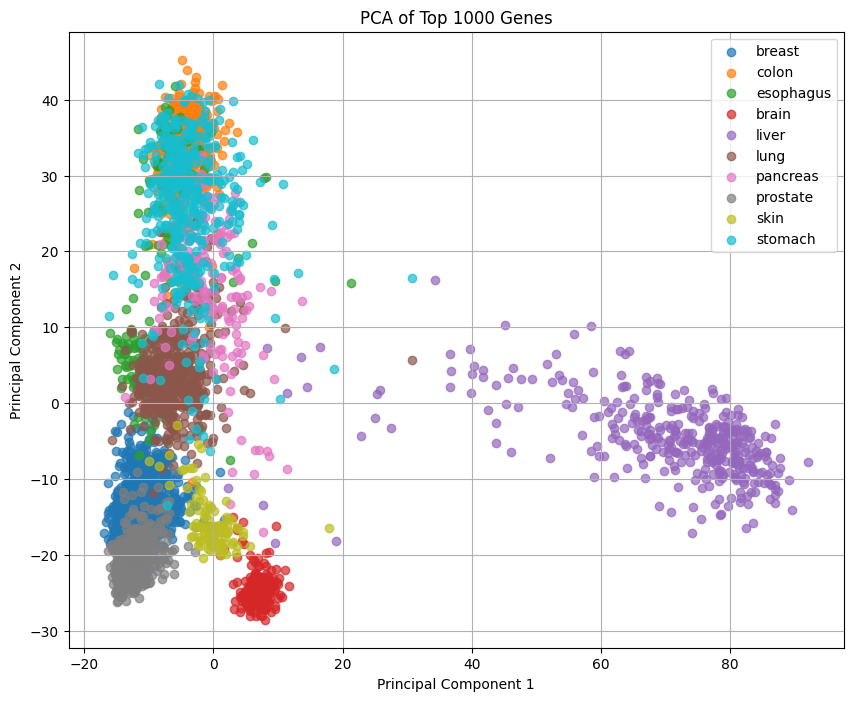

Explained variance ratio (first 10 components): [0.27284294 0.19311052 0.10891314 0.08518082 0.04105855 0.02356569
 0.02042058 0.01325802 0.01139836 0.00954614]
Cumulative explained variance (first 10 components): [0.27284294 0.46595346 0.5748666  0.66004742 0.70110597 0.72467166
 0.74509224 0.75835026 0.76974862 0.77929476]


In [128]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

#Do I need to scale before PCA?

# Perform PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_selected)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=principal_components[:, [0, 1]],  # Use only the first 2 components for visualization
    columns=['PC1', 'PC2']
)

# Add tumor_type labels from scaled_data
pca_df['tumor_type'] = primary_tumors['tumor_type'].values

# Plot the PCA results
plt.figure(figsize=(10, 8))
for tumor in pca_df['tumor_type'].unique():
    subset = pca_df[pca_df['tumor_type'] == tumor]
    plt.scatter(subset['PC1'], subset['PC2'], label=tumor, alpha=0.7)

plt.title('PCA of Top 1000 Genes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio (first 10 components):", explained_variance_ratio)

# Optional: Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative explained variance (first 10 components):", cumulative_variance)

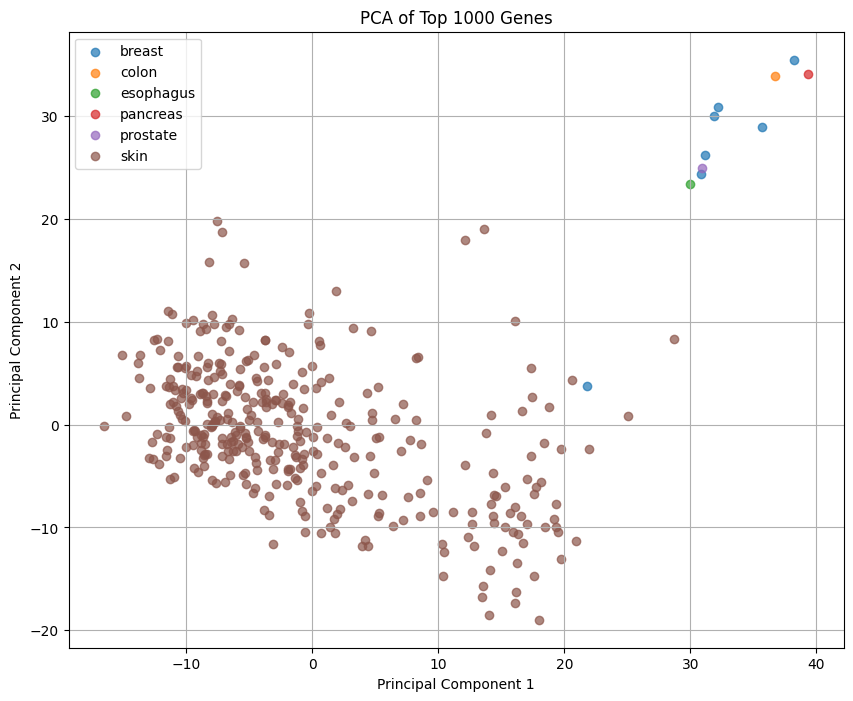

Explained variance ratio (first 10 components): [0.15839587 0.08835631 0.04962156 0.04610056 0.03538541 0.03122832
 0.0219848  0.01976656 0.01605753 0.01528647]
Cumulative explained variance (first 10 components): [0.15839587 0.24675217 0.29637373 0.34247429 0.3778597  0.40908802
 0.43107282 0.45083938 0.46689691 0.48218339]


In [129]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

#Do I need to scale before PCA?

# Perform PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(diff_genes_mets)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=principal_components[:, [0, 1]],  # Use only the first 2 components for visualization
    columns=['PC1', 'PC2']
)

# Add tumor_type labels from scaled_data
pca_df['tumor_type'] = metastases['tumor_type'].values

# Plot the PCA results
plt.figure(figsize=(10, 8))
for tumor in pca_df['tumor_type'].unique():
    subset = pca_df[pca_df['tumor_type'] == tumor]
    plt.scatter(subset['PC1'], subset['PC2'], label=tumor, alpha=0.7)

plt.title('PCA of Top 1000 Genes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio (first 10 components):", explained_variance_ratio)

# Optional: Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative explained variance (first 10 components):", cumulative_variance)

In [130]:
from catboost import CatBoostClassifier, Pool

In [163]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(diff_genes_primary, test_size=0.3, shuffle=True)

In [164]:
#train_data.head(10)
test_data['tumor_type'].unique()
#sum(test_data['tumor_type'] == 'breast')
#test_data.info()
#test_data.shape

array(['lung', 'stomach', 'breast', 'colon', 'prostate', 'pancreas',
       'skin', 'esophagus', 'liver', 'brain'], dtype=object)

In [165]:
X_train = train_data.drop(columns=['index', 'tumor_type']) #two brackets to create a dataframe
y_train = train_data['tumor_type']

X_test = test_data.drop(columns=['index', 'tumor_type'])
y_test = test_data['tumor_type']

In [166]:
model = CatBoostClassifier(iterations=1000,
                           depth=2,
                           learning_rate=0.1,
                           loss_function='MultiClass',
                           verbose=True)

In [167]:
# train the model
model.fit(X_train, y_train)

0:	learn: 1.9859679	total: 123ms	remaining: 2m 2s
1:	learn: 1.8120900	total: 192ms	remaining: 1m 35s
2:	learn: 1.6461799	total: 261ms	remaining: 1m 26s
3:	learn: 1.5515723	total: 329ms	remaining: 1m 22s
4:	learn: 1.4527624	total: 397ms	remaining: 1m 18s
5:	learn: 1.3572200	total: 461ms	remaining: 1m 16s
6:	learn: 1.2951641	total: 529ms	remaining: 1m 15s
7:	learn: 1.2396491	total: 593ms	remaining: 1m 13s
8:	learn: 1.1796505	total: 658ms	remaining: 1m 12s
9:	learn: 1.1141536	total: 723ms	remaining: 1m 11s
10:	learn: 1.0656055	total: 787ms	remaining: 1m 10s
11:	learn: 1.0093228	total: 851ms	remaining: 1m 10s
12:	learn: 0.9674025	total: 917ms	remaining: 1m 9s
13:	learn: 0.9272285	total: 985ms	remaining: 1m 9s
14:	learn: 0.8927322	total: 1.05s	remaining: 1m 9s
15:	learn: 0.8592715	total: 1.12s	remaining: 1m 8s
16:	learn: 0.8305818	total: 1.19s	remaining: 1m 8s
17:	learn: 0.7951141	total: 1.26s	remaining: 1m 8s
18:	learn: 0.7596029	total: 1.33s	remaining: 1m 8s
19:	learn: 0.7253556	total: 1.

Accuracy: 0.9827160493827161

Classification Report:
               precision    recall  f1-score   support

       brain       1.00      1.00      1.00        49
      breast       0.99      1.00      1.00       316
       colon       1.00      1.00      1.00       136
   esophagus       0.83      0.84      0.83        51
       liver       1.00      1.00      1.00       123
        lung       1.00      0.99      1.00       167
    pancreas       0.98      0.98      0.98        64
    prostate       1.00      1.00      1.00       148
        skin       1.00      0.94      0.97        32
     stomach       0.94      0.93      0.93       129

    accuracy                           0.98      1215
   macro avg       0.97      0.97      0.97      1215
weighted avg       0.98      0.98      0.98      1215



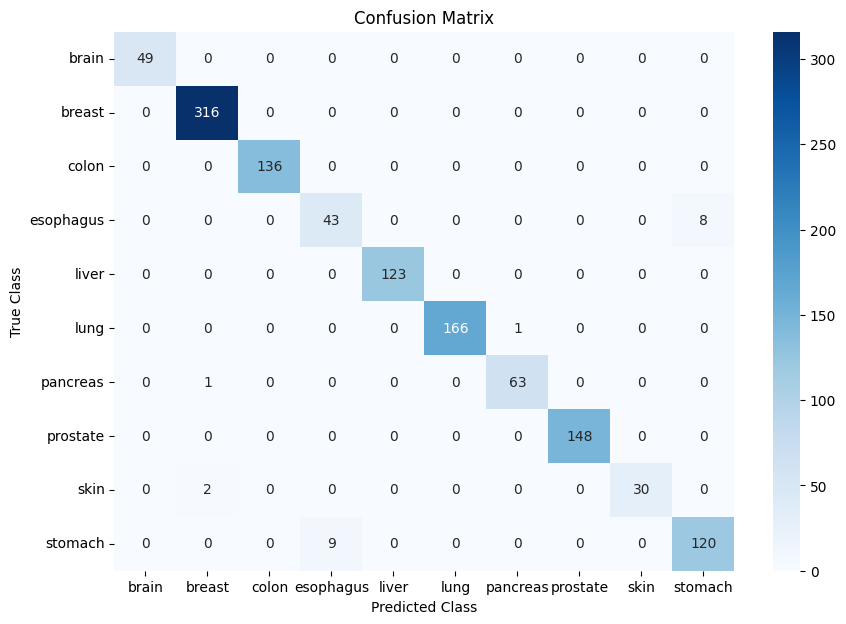

In [168]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, preds_class)
report = classification_report(y_test, preds_class)
conf_matrix = confusion_matrix(y_test, preds_class)

# Results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, preds_class)

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [169]:
X_test_mets = diff_genes_metastases.drop(columns=['index', 'tumor_type'])
y_test_mets = diff_genes_metastases['tumor_type']
y_test_mets.unique()

array(['breast', 'colon', 'esophagus', 'pancreas', 'prostate', 'skin'],
      dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9602122015915119

Classification Report:
               precision    recall  f1-score   support

      breast       0.43      0.86      0.57         7
       colon       1.00      1.00      1.00         1
   esophagus       1.00      1.00      1.00         1
       liver       0.00      0.00      0.00         0
        lung       0.00      0.00      0.00         0
    pancreas       0.50      1.00      0.67         1
    prostate       1.00      1.00      1.00         1
        skin       1.00      0.96      0.98       366

    accuracy                           0.96       377
   macro avg       0.62      0.73      0.65       377
weighted avg       0.99      0.96      0.97       377



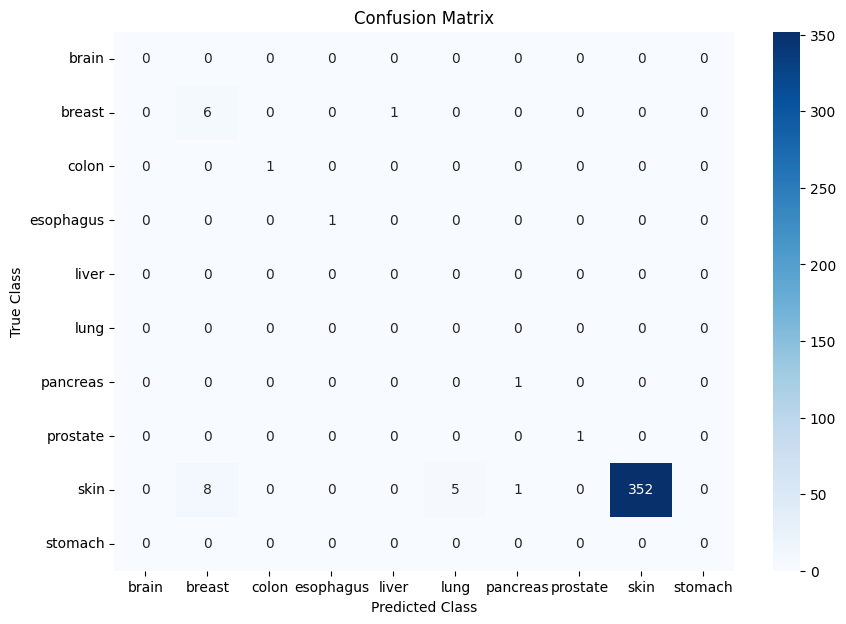

In [171]:
X_test_mets = diff_genes_metastases.drop(columns=['index', 'tumor_type'])
y_test_mets = diff_genes_metastases['tumor_type']

preds_class2 = model.predict(X_test_mets)  # Predict class labels directly
preds_proba2 = model.predict_proba(X_test_mets) 

# Metrics
accuracy = accuracy_score(y_test_mets, preds_class2)
report = classification_report(y_test_mets, preds_class2)
conf_matrix = confusion_matrix(y_test_mets, preds_class2)

# Results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test_mets, preds_class2, labels=model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()